# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('D:/Studing DATA/Model_python/data/yulu_rental.csv')

In [2]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [3]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012-12-19,19,51,2,Wednesday,2012,12,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012-12-19,19,51,2,Wednesday,2012,12,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012-12-19,19,51,2,Wednesday,2012,12,21


 В цьому датафреймі 10886 рядків 19 колонок( бо ми ж попереднім кодом додали колонки), за індекс використовується часовий показник datetime, він і є найменшою деталлю, тобто 1 рядок це 1 година і ми маємо вписані показники за 1 годину.

Даних 10886 рядків, 14 колонок.
В кожному рядку сума оренд велосипедів за 1 годину.

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


## Не вірно зрозуміла завдання(потренувалась)нижче

In [4]:
rent_by_weekday = df.groupby('weekday_num')
rent_by_weekday['count'].sum()

weekday_num
0    295296
1    291985
2    292226
3    306401
4    302504
5    311518
6    285546
Name: count, dtype: int64

In [5]:
rent_by_weekday = df.groupby(['weekday_num', 'weekday'])['count'].sum()
print(rent_by_weekday)

weekday_num  weekday  
0            Monday       295296
1            Tuesday      291985
2            Wednesday    292226
3            Thursday     306401
4            Friday       302504
5            Saturday     311518
6            Sunday       285546
Name: count, dtype: int64


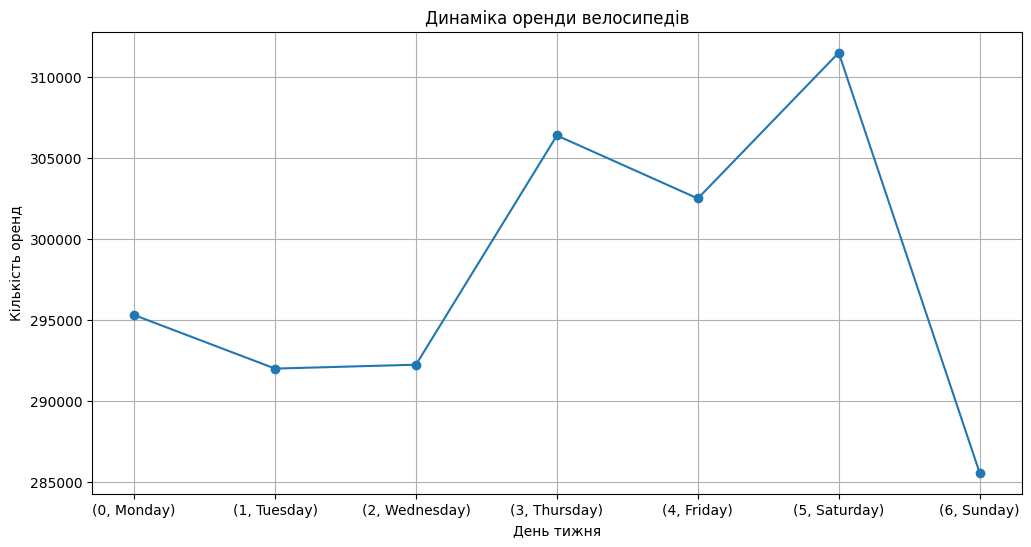

In [6]:
rent_by_weekday.plot(
    marker='o',
    figsize=(12, 6),
    title='Динаміка оренди велосипедів',
    xlabel='День тижня',
    ylabel='Кількість оренд',
    grid=True
);

## Виконання завдання (спроба 2) 

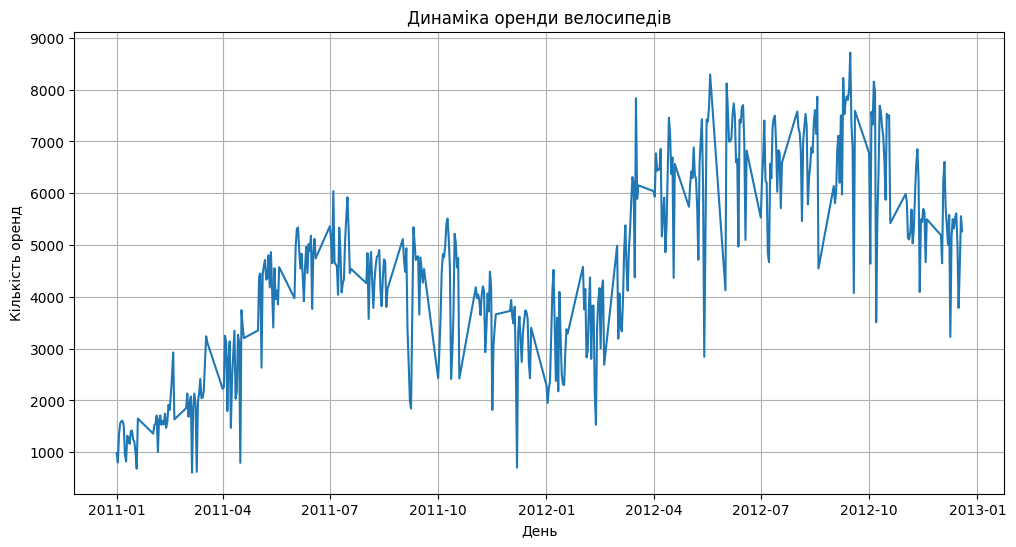

In [7]:
rent_by_day = df.groupby(['date'])['count'].sum()
rent_by_day.plot(
    figsize=(12, 6),
    title='Динаміка оренди велосипедів',
    xlabel='День',
    ylabel='Кількість оренд',
    grid=True
);

### Питання для інтерпретації:

#### Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
*  Графік має заломи бо ми дивимось на данні через дуже дрібний показник- день, якщо згрупувати по тижням або місяцям, ми побачимо загальну динаміку, але не буде таких різких заломів, також можна для кращого сприйняття дивитись на поденний графік, але не сумму, а середнє( графіки нижче, не підтвердив)


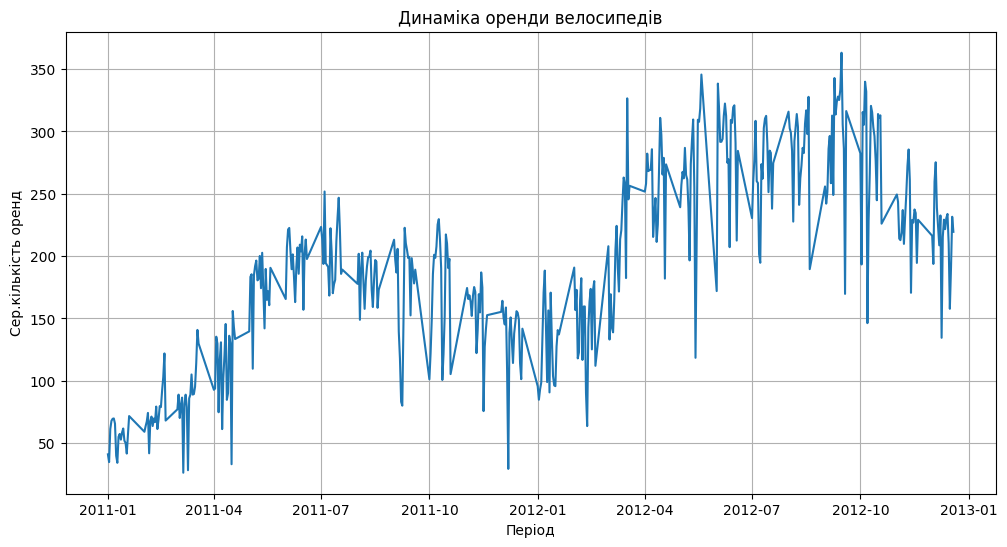

In [8]:
rent_by_day_mean = df.groupby(['date'])['count'].mean()
rent_by_day_mean.plot(
    figsize=(12, 6),
    title='Динаміка оренди велосипедів',
    xlabel='Період',
    ylabel='Сер.кількість оренд',
    grid=True
);
# Виходить помилилась, по факту графік поденно, але  це теж саме, але шкала оренд в іншому діапазоні бо вона середня.

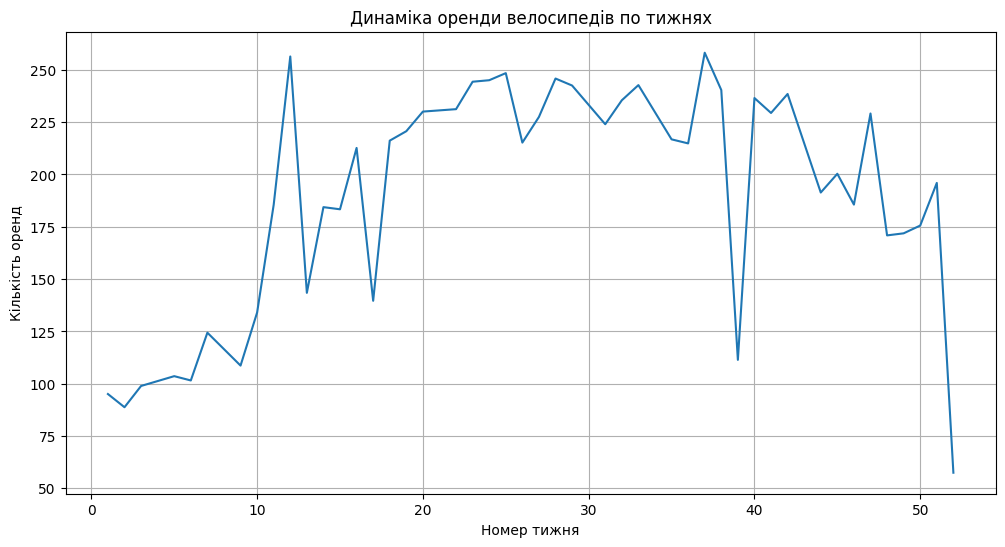

In [9]:
rent_by_week = df.groupby(['week'])['count'].mean()
rent_by_week.plot(
    figsize=(12, 6),
    title='Динаміка оренди велосипедів по тижнях',
    xlabel='Номер тижня',
    ylabel='Кількість оренд',
    grid=True
);

#### Які загальні тенденції ви бачите на графіку?
  * Загальна тенденція, зростання оренд по ходу зміни сезону від холодного до теплого.


#### Чи помітні якісь сезонні коливання?
* Дивлячись навіть на самий перший графік поденно, я бачу чітку кореляцію сезон- кількість оренд, тобто холодний сезон- менше оренд,проте відносно років оренди показники теж неоднорідні, загальна кількість оренд 2011 року явно менша ніж оренди впродовж 2012 року, це може бути пов'язане з безліччю факторів, такими як , кращі погодні умови впродовж холодного сезону + краща рекламна компанія, впізнаваність сервісу, більша довіра користувачів.
#### Чи є періоди з аномально високиими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?
* Якщо дивитись графік Динаміка оренди велосипедів по тижнях то видно 2 різні зниження оренди на 16 тижні року(обох років рахує) і на 39,5 нижні року, я припускаю це через погодні умови - похолодання, дощ. Щодо різкого підвищення оренди це приблизно 12 тиждень року - перші теплі дні). Давайте спробуємо перевірити.

In [10]:
weekly = df.groupby('week').agg({
    'temp': 'mean',      # середня температура
    'count': 'mean'       # кількість оренд за тиждень
})


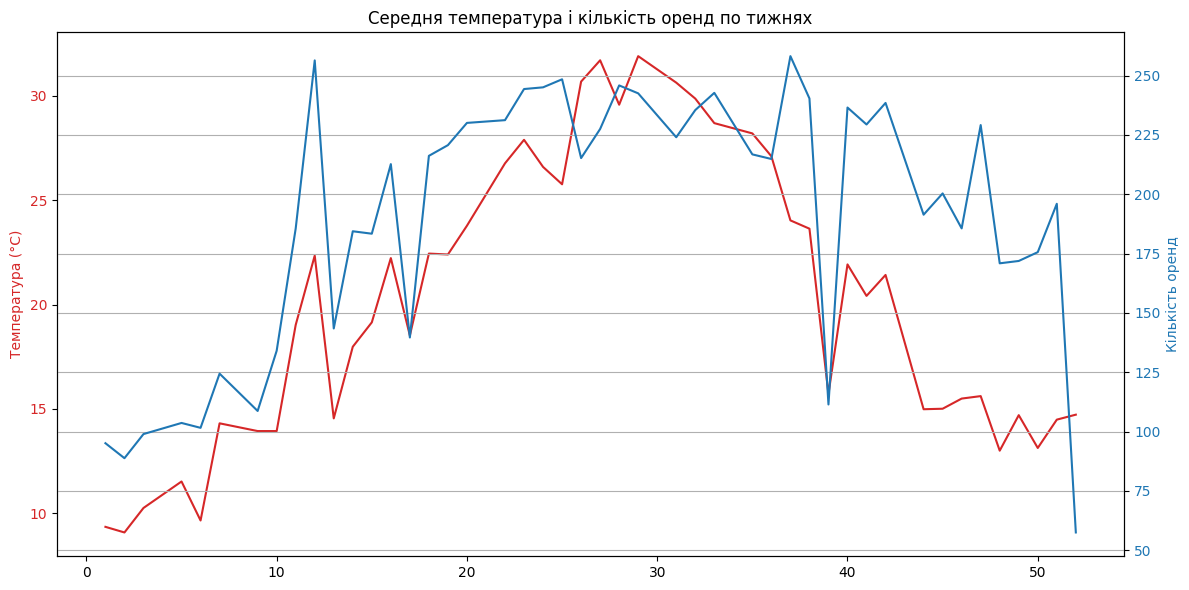

In [11]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 6))

# Графік температури (ліва вісь)
ax1.plot(weekly.index, weekly['temp'], color='tab:red', label='Середня температура')
ax1.set_ylabel('Температура (°C)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Додатковий графік оренд (права вісь)
ax2 = ax1.twinx()
ax2.plot(weekly.index, weekly['count'], color='tab:blue', label='Кількість оренд')
ax2.set_ylabel('Кількість оренд', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Середня температура і кількість оренд по тижнях')
plt.grid(True)
fig.tight_layout()
plt.show()


#### Висновок
 * Бачимо чітку кореляцію температури та пікових значень кількості оренди веловипедів.


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами. Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте сезони не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який сезон найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?

In [12]:
season_rent = df.groupby('season')['count'].mean()

In [13]:
season_rent

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64

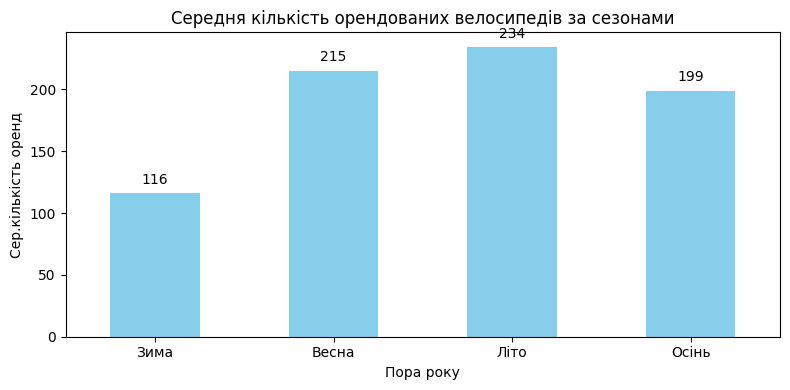

In [14]:
ax = season_rent.plot.bar(
    figsize=(8, 4),
    color='skyblue',
    title='Середня кількість орендованих велосипедів за сезонами',
    ylabel='Сер.кількість оренд',
    xlabel='Пора року'
)

# Додаємо підписи над стовпцями
for bar in ax.patches:  
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 5, f'{height:.0f}', ha='center', va='bottom')

labels = ['Зима', 'Весна', 'Літо', 'Осінь']
ax.set_xticklabels(labels)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [15]:
234/116

2.0172413793103448

## Питання для інтерпретації:

### В який сезон найбільша середня кількість оренди велосипедів?
* Влітку
### Як ви можете пояснити таку сезонну закономірність?
* Як ми вже бачити, одна з причин погодні умови(температурний режим).
### У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?
* в 2 рази 

## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


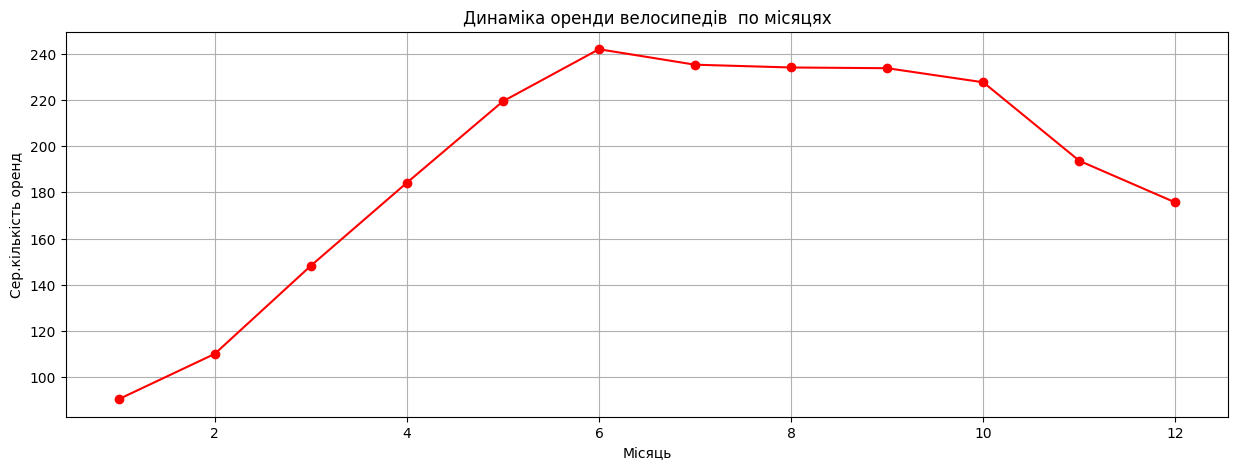

In [16]:
## створююю поки прсто графік по місяцях
rent_by_day_mean = df.groupby(['month'])['count'].mean()
rent_by_day_mean.plot(
    marker='o',
    
    figsize=(15, 5),
    title='Динаміка оренди велосипедів  по місяцях',
    xlabel='Місяць',
    ylabel='Сер.кількість оренд',
    color='red',
    grid=True
);

In [17]:
df['date'] = pd.to_datetime(df['date'])  

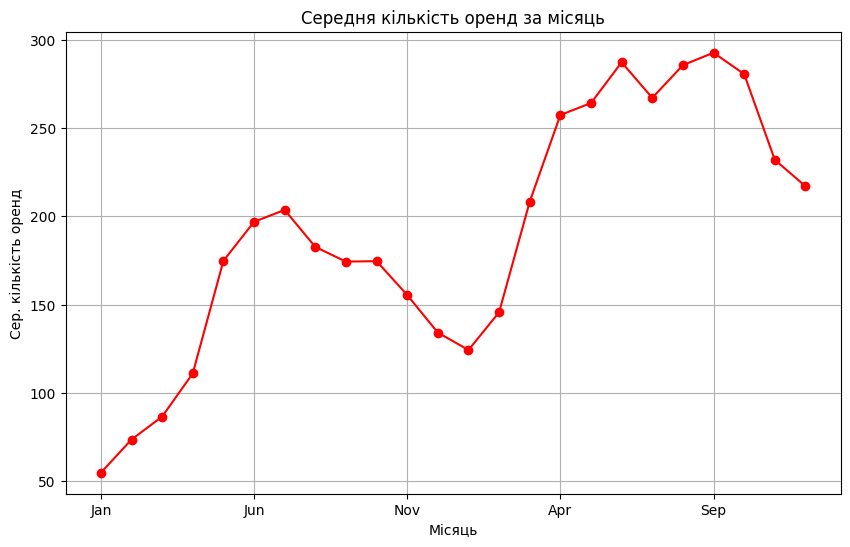

In [18]:
date_day_avg = df.groupby('date')['count'].mean()
date_month_avg = date_day_avg.resample('ME').mean()

# Створимо новий індекс — лише назви місяців
date_month_avg.index = date_month_avg.index.strftime('%b')  

# Побудова графіка
date_month_avg.plot(
    kind='line',
    marker='o',
    figsize=(10, 6),
    title='Середня кількість оренд за місяць',
    xlabel='Місяць',
    ylabel='Сер. кількість оренд',
    color='red',
    grid=True
);


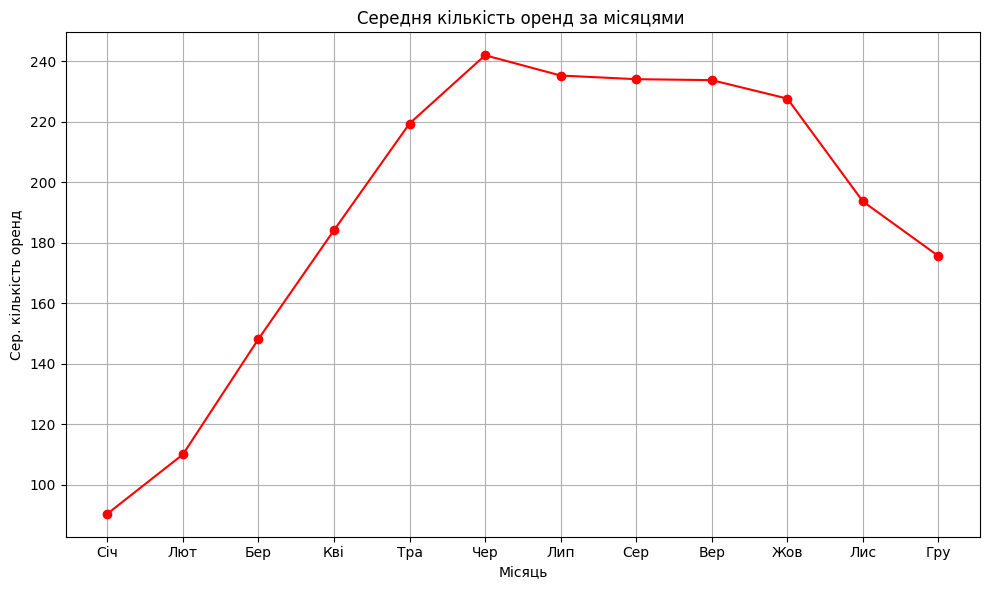

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Переконаймося, що 'date' — datetime
df['date'] = pd.to_datetime(df['date'])


monthly_avg = df.groupby('month')['count'].mean()


ukr_months = ['Січ', 'Лют', 'Бер', 'Кві', 'Тра', 'Чер',
              'Лип', 'Сер', 'Вер', 'Жов', 'Лис', 'Гру']


plt.figure(figsize=(10, 6))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', color='red')
plt.xticks(ticks=range(1, 13), labels=ukr_months)

plt.title('Середня кількість оренд за місяцями ')
plt.xlabel('Місяць')
plt.ylabel('Сер. кількість оренд')
plt.grid(True)
plt.tight_layout()
plt.show()


 ## Питання для інтерпретації:
1. В які місяці спостерігається пік та спад оренди?
   * Пік в червні і тримається до жовтня, найгірне в грудні і січні.
3. Чи збігається ця закономірність з результатами з попереднього завдання?
   * Збігається.
5. Як може вплинути клімат на оренду велосипедів протягом року?
   * Прямо впливає, кращі кліматичні умови створюють попит на оренду веловипедів.

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму частки днів з різними погодними умовами.
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

In [20]:
wether_count = df.groupby('weather')['count'].mean()

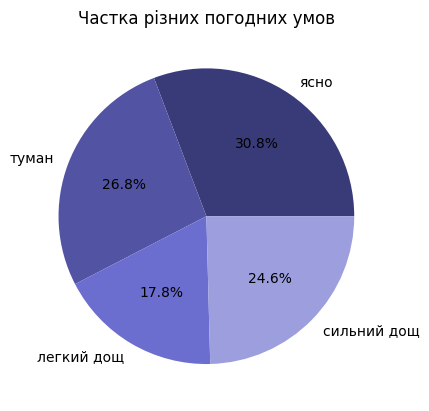

In [21]:
wether_count.plot.pie(
    # figsize=(8, 8),
    autopct='%1.1f%%',
    labels=['ясно', 'туман', 'легкий дощ', 'сильний дощ'],
    title='Частка різних погодних умов',
    ylabel='',
        colors=plt.cm.tab20b.colors
);

### Питання для інтерпретації:
1. Яка погода переважає в датасеті?
* Переважає ясна погода.
3. Чи є дні із сильним дощем? Яка їх частка?
* Є, частка таких днів 24,6%
4. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?
* Туман та сильний дощ негативно впливають на попит оренди, на мою думку легкий дощ також впливає негативно проте не так сильно, треба далі досліджувати.

In [22]:
wether_count_sum = df.groupby('weather')['count'].sum()
wether_count_sum 

weather
1    1476063
2     507160
3     102089
4        164
Name: count, dtype: int64

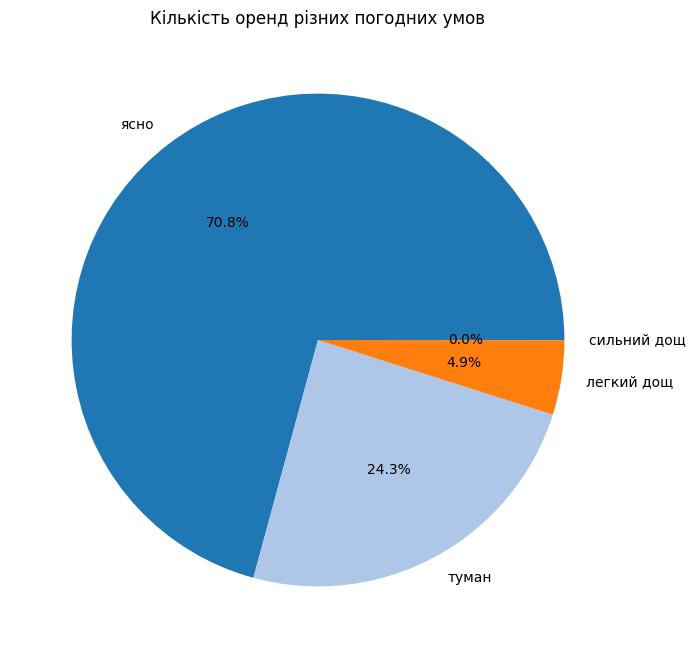

In [23]:
wether_count_sum.plot.pie(
    figsize=(8, 8),
    autopct='%1.1f%%',
    labels=['ясно', 'туман', 'легкий дощ', 'сильний дощ'],
    title='Кількість оренд різних погодних умов',
    ylabel='',
        colors=plt.cm.tab20.colors
);

#### Відповідь 
* Всього за період даних 30,8% днів були ясними, саме в ці дні відбулось 70,8% оренд велосипедів.
* ### Тому кореляція беззаперечна, попит залежить від погодних умов .
* На мій подив туман впливає на попит менше ніж легкий дощ.

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

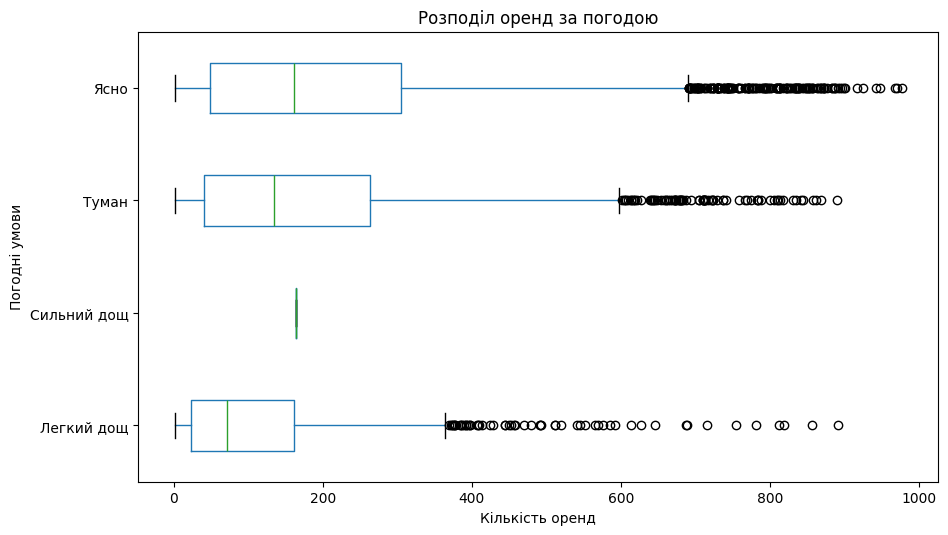

In [24]:
# Перетворення: створюємо нову колонку
weather_map = {
    1: 'Ясно',
    2: 'Туман',
    3: 'Легкий дощ',
    4: 'Сильний дощ'
}
df['weather_name'] = df['weather'].map(weather_map)


df.boxplot(
    column='count',
    by='weather_name',
    figsize=(10, 6),
    grid=False,
    vert=False
)

plt.title('Розподіл оренд за погодою')
plt.suptitle('')
plt.xlabel('Кількість оренд')
plt.ylabel('Погодні умови');



**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
   * при ясній погоді
2. Чи є викиди (outliers) в даних? При якій погоді?
   * так, присутні при всіх погодах крім сильного дощу.
3. При якій погоді медіанне значення оренди найвище?
   * також при ясній погоді.

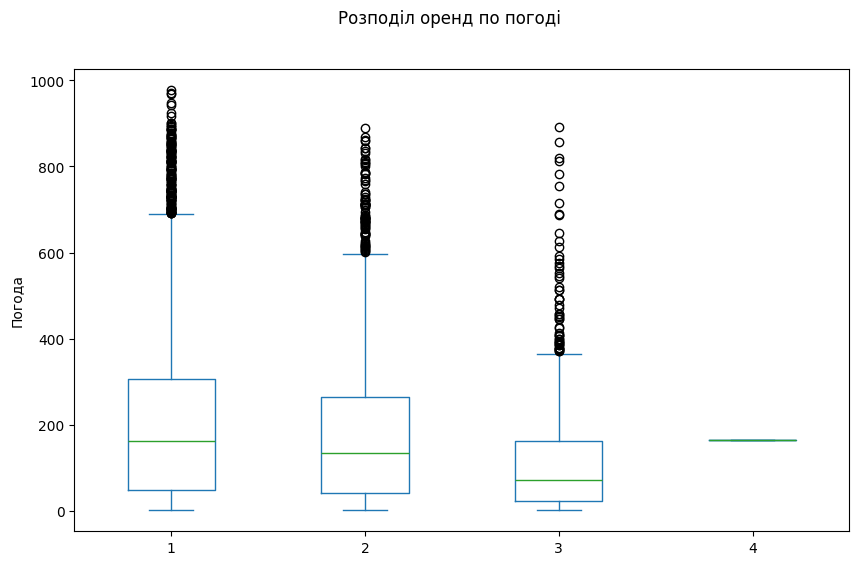

In [25]:
# Спосіб 2: через plot.box()
df[['count', 'weather']].plot.box(
    by='weather',
    figsize=(10, 6),
    title='Розподіл оренд по погоді',
    ylabel='Погода'
)
plt.title('');

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

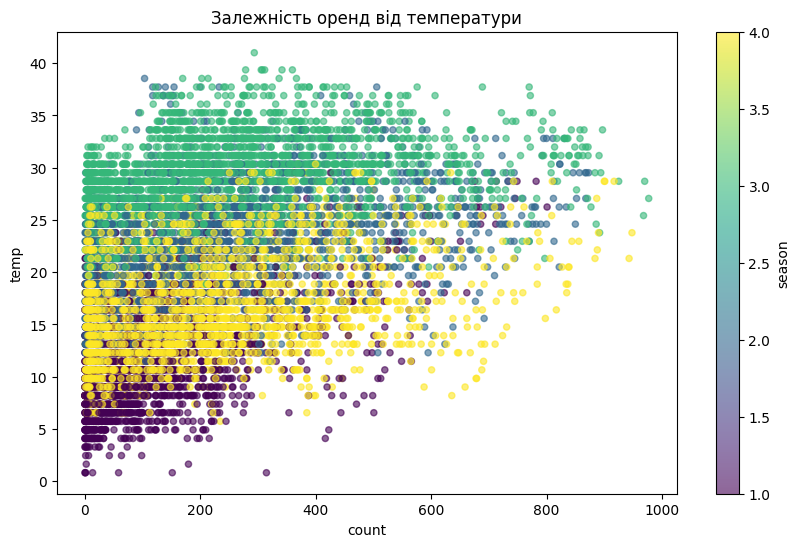

In [26]:
df.plot.scatter(
    x='count',
    y='temp',
    c='season',
    colormap='viridis',
    title='Залежність оренд від температури',
    figsize=(10, 6),
    alpha=0.6
)
plt.show()

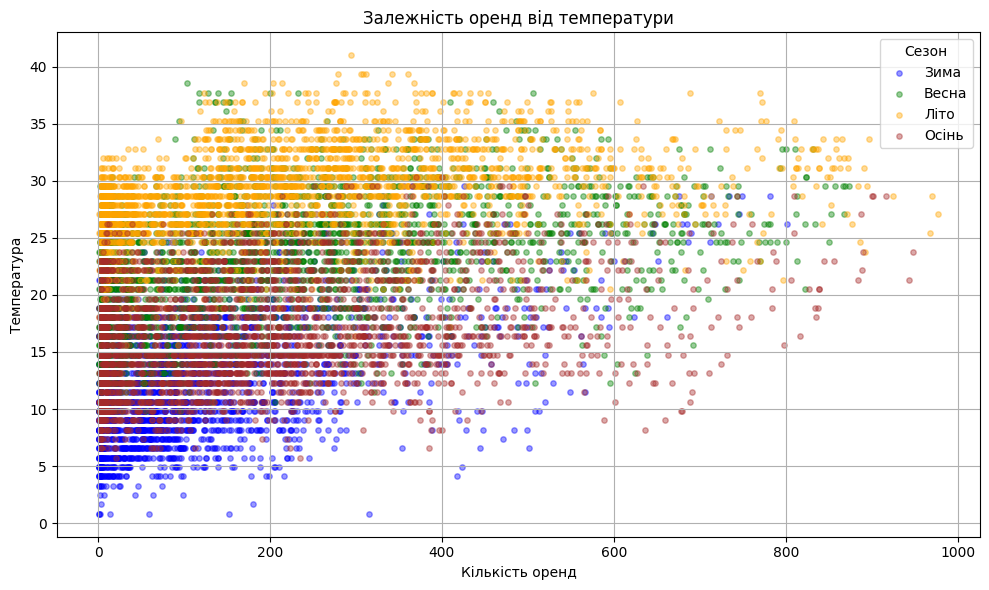

In [27]:
import matplotlib.pyplot as plt


season_map = {
    1: 'Зима',
    2: 'Весна',
    3: 'Літо',
    4: 'Осінь'
}

df['season_name'] = df['season'].map(season_map)

colors = {
    'Зима': 'blue',
    'Весна': 'green',
    'Літо': 'orange',
    'Осінь': 'brown'
}

plt.figure(figsize=(10, 6))

for season, color in colors.items():
    subset = df[df['season_name'] == season]
    plt.scatter(
        subset['count'],
        subset['temp'],
        label=season,
        color=color,
        alpha=0.4,
        s=15
    )

plt.title('Залежність оренд від температури')
plt.xlabel('Кількість оренд')
plt.ylabel('Температура')
plt.legend(title='Сезон')
plt.grid(True)
plt.tight_layout()
plt.show()


 #### Питання для інтерпретації:

#### Чи є зв'язок між температурою та кількістю оренди? Який?
* Зв'язок безперечно є , але напевно для створення цього графіка варто не використовувати рядки зі дначенням 0, тобто коли оренда взаглі не відбуваласьнічні години або що, проте я перевірила і не знайшла значень каунт 0, тому я дещо спантеличена і шукаю відповідь на це питання .
  

In [28]:
df[df['count'] == 0].shape[0]

0

## Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

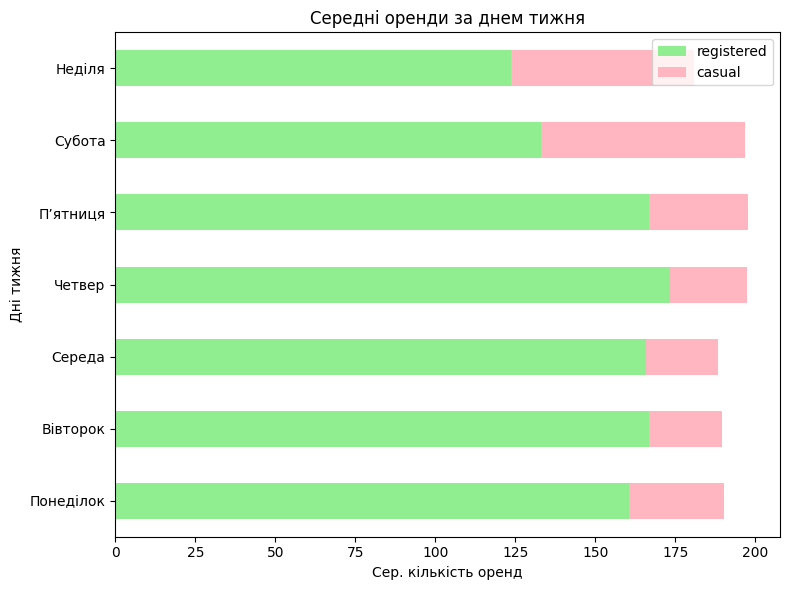

In [35]:
# Припустимо, у вас є колонки 'registered' і 'casual' із кількістю оренд за день
# Групуємо по дню тижня (0=Понеділок, ..., 6=Неділя) і рахуємо середнє
avg_rent_by_day = df.groupby(df.index.weekday)[['registered', 'casual']].mean()

# Малюємо горизонтальну стовпчасту діаграму з накопиченням
ax = avg_rent_by_day.plot.barh(
    stacked=True,
    figsize=(8,6),
    title='Середні оренди за днем тижня',
    xlabel='Сер. кількість оренд',
    ylabel='Дні тижня',
    color=['lightgreen', 'lightpink']
)

# Встановлюємо українські підписи днів тижня на осі Y
ax.set_yticklabels(['Понеділок', 'Вівторок', 'Середа', 'Четвер', "Пʼятниця", 'Субота', 'Неділя'])

plt.tight_layout()
plt.show()


### В які дні тижня більше оренд від зареєстрованих користувачів?
* Четвер найпопулярніший серед зареєстрованих користувачів, але їх в цілому завжди більше ніж незареєстрованих. Проте особливо гарно проглядається, що в будні дні сервіс популярний саме серед зареєстрованих користувачів, а в вихідні кількість незареєстрованих користувачів стрімко більшується.
### Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?
* Як на мене це обсолютно логічний зв'язок, на вихідних збільшується кількість незареєстрованих споживачів, тому що більше людей пробує це вперше , або як непостійна активність - дозвілля, В той час як на буднях беруть в оренду ті хто наприклад заміняє тренування в залі посеред тижня, логічно що таких користувачів цікавиль абономент або програма лоялності для реєстрованих користувачів..